In [1]:
# 구글 드라이브와 연결
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# 형태소 분석기 설치
!apt-get update
!apt-get install g++ openjdk-8-jdk
!pip install JPype1
!pip install rhinoMorph # 형태소 분석기 RHINO 사용

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 https://cloud.r-project.org/bin/linux/ubuntu bi

In [3]:
# 경로 변경
!cd /content/gdrive/My\ Drive/pytest/

/bin/bash: line 0: cd: /content/gdrive/My Drive/pytest/: No such file or directory


In [10]:
# 데이터 로딩
def read_data(filename, encoding='cp949'): # 읽기 함수 정의
  with open(filename, 'r', encoding=encoding) as f:
    data = [line.split('\t') for line in f.read().splitlines()]
    data = data[1:] # txt 파일의 헤더(id document label)는 제외하기
    return data

def write_data(data, filename, encoding='cp949'): # 쓰기 함수도 정의
  with open(filename, 'w', encoding=encoding) as f:
    f.write(data)

data = read_data('/content/gdrive/MyDrive/AI service/pytest/ratings.txt' , encoding='cp949') # 샘플파일은 ratings_small.txt

In [12]:
# 형태소 분석
import rhinoMorph
rn = rhinoMorph.startRhino()

morphed_data = ''
for data_each in data:
  morphed_data_each = rhinoMorph.onlyMorph_list(rn, data_each[1],
                                                pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'])
  joined_data_each = ' '.join(morphed_data_each) # 문자열을 하나로 연결
  if joined_data_each: # 내용이 있는 경우만 저장하게 함
    morphed_data += data_each[0]+"\t"+joined_data_each+"\t"+data_each[2]+"\n"

# 형태소 분석된 파일 저장
write_data(morphed_data, 'ratings_morphed_2.txt', encoding='cp949')

filepath:  /usr/local/lib/python3.7/dist-packages
classpath:  /usr/local/lib/python3.7/dist-packages/rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!


# 감성 사전을 이용한 감성분석

In [13]:
# 형태분석된 데이터 로딩

data = read_data('ratings_morphed_2.txt' , encoding='cp949')
print(len(data))
print(len(data[0])) 
print(data[0])

197513
3
['8132799', '디자인 배우 학생 외국 디자이너 일구 전통 통하 발전 문화 산업 부럽 사실 우리나라 그 어렵 시절 끝 열정 지키 노라노 같 전통 있 같 사람 꿈 꾸 이루 나가 있 감사', '1']


In [15]:
# 감성사전 읽기
data_id = [line[0] for line in data] # 데이터 id
data_text = [line[1] for line in data] # 데이터 본문
data_senti = [line[2] for line in data] # 데이터 긍부정 부분

positive = read_data('/content/gdrive/MyDrive/AI service/pytest/positive.txt') # 긍정 감정사전 읽기
negative = read_data('/content/gdrive/MyDrive/AI service/pytest/negative.txt') # 부정 감정사전 읽기

print("positive:", positive)
print("negatvie:", negative)

pos_found = [] # 각 문장에서 발견될 긍정어의 개수
neg_found = [] # 각 문장에서 발견될 부정어의 개수

positive: [['가능'], ['가능하'], ['가락'], ['가치'], ['간단하'], ['간단히'], ['간직하'], ['간호'], ['간호하'], ['감동'], ['감사'], ['감사하'], ['감싸'], ['감탄하'], ['강화'], ['강화되'], ['강화하'], ['갚'], ['개방되'], ['개방하'], ['개선'], ['개선되'], ['개선하'], ['개혁'], ['거침없이'], ['건강'], ['건장하'], ['걸맞'], ['격려'], ['결심'], ['결심하'], ['결혼'], ['결혼하'], ['경감'], ['경감되'], ['공언'], ['공언하'], ['공정하'], ['관대하'], ['관리되'], ['굉장하'], ['구원'], ['굳'], ['귀엽'], ['귀하'], ['균형'], ['그치'], ['극복'], ['극복하'], ['근절되'], ['근절하'], ['긁'], ['긍정'], ['기념'], ['기대'], ['기부하'], ['기쁘'], ['기쁨'], ['기사도'], ['기적'], ['기회'], ['깨끗하'], ['꼼꼼하'], ['꽃'], ['꿀'], ['끌리'], ['나아가'], ['낙'], ['낫'], ['넓'], ['넓히'], ['노력'], ['노력하'], ['논리'], ['논의'], ['논의하'], ['놀랍'], ['놀이'], ['늘리'], ['다이아몬드'], ['다정'], ['다행히'], ['단장'], ['달래'], ['달콤하'], ['대단'], ['대담하'], ['대화'], ['덕'], ['도덕'], ['도전'], ['독립'], ['독립되'], ['돌보'], ['돕'], ['동의'], ['동의하'], ['되살리'], ['드라이브'], ['따르'], ['뚜렷하'], ['뛰어나'], ['띄우'], ['마법'], ['만족'], ['만족하'], ['맑'], ['맑음'], ['맛'], ['맛있'], ['맞'], ['맞추'], ['매력'], ['멋지'], ['메이저'], ['면밀히'], ['명백히'], ['명시되'], ['명예']

In [17]:
# 감정단어 파악
def cntWordInLine(data, senti):
  senti_found = []
  for onedata in data:
    oneline_word = onedata.split(' ') # 한 줄의 데이터를 공백 단위로 분리하여 리스트로 저장
    senti_temp = 0 # 그 줄에서 발견된 감정단어의 수를 담는 변수
    for sentiword in senti: # 감정사전의 어휘
      if sentiword[0] in oneline_word: # ★ sentiword[0] 하여 리스트 원소를 문자열로 추출. (함수 관계 잘 생각해보기)
        senti_temp += 1 # sentiword[0] 하여 리스트 원소를 문자열로 추출
    senti_found.append(senti_temp) # 현재의 줄에서 찾은 감성단어의 숫자를 해당 위치에 저장
  return senti_found

data_senti_poscnt = cntWordInLine(data_text, positive) # 발견된 긍정 단어의 숫자 파악
data_senti_negcnt = cntWordInLine(data_text, negative) # 발견된 부정 단어의 숫자 파악

print(data_senti_poscnt[:20])
print(data_senti_negcnt[:20])

[5, 1, 0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 1, 0, 1, 0]
[1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1]


In [18]:
# 감정점수 계산
import pandas as pd # Pandas 데이터프레임으로 저장
newdata = pd.DataFrame({'id':data_id, 'text':data_text, 'original':data_senti, 
                        'pos':data_senti_poscnt, 'neg':data_senti_negcnt})
senti_score = newdata['pos'] - newdata['neg'] # 긍정개수에서 부정개수를 뺌
newdata['senti_score'] = senti_score # 그 수를 senti_score 컬럼에 저장

newdata.loc[newdata.senti_score > 0, 'new'] = 1 # 새로운 긍부정 기호
newdata.loc[newdata.senti_score <= 0, 'new'] = 0 # 새로운 긍부정 기호

# 처음에 기록된 긍부정과 새로 계산된 긍부정이 같은지 여부를 matched 컬럼에 저장
# original 컬럼은 문자로 되어 있으므로 숫자로 변환 뒤 비교
newdata.loc[pd.to_numeric(newdata.original) == newdata.new, 'matched'] = 'True'
newdata.loc[pd.to_numeric(newdata.original) != newdata.new, 'matched'] = 'False'

In [20]:
# 원점수와 비교 (original VS new) 및 저장
score = newdata.matched.str.count('True').sum() / (newdata.matched.str.count('True').sum() 
+ newdata.matched.str.count('False').sum()) * 100
print(score)
newdata.to_csv('newfile.csv', sep=',', encoding='cp949', index=False) # csv 저장
newdata.to_csv('newfile2.txt', sep='\t', encoding='cp949', index=False) # 또는 txt 저장

newdata.head()

62.54221241133495


,id,text,original,pos,neg,senti_score,new,matched
0,8132799,디자인 배우 학생 외국 디자이너 일구 전통 통하 발전 문화 산업 부럽 사실 우리나라...,1,5,1,4,1.0,True
1,4655635,폴리스스토리 시리즈 뉴 없 최고,1,1,0,1,1.0,True
2,9251303,와 연기 진짜 쩔 지루 생각하 몰입 그래 이런 진짜 영화,1,0,1,-1,0.0,False
3,10067386,안개 자욱 하 밤하늘 뜨 초승달 같 영화,1,0,0,0,0.0,False
4,2190435,사랑 해보 사람 처음 끝 웃 있 영화,1,2,0,2,1.0,True


**< 시그모이드 함수 사용 >**

- 시그모이드 함수는 모든 값을 0~1 사이로 변경해준다

- 따라서 각 문장에 긍정 혹은 부정 단어가 아무리 많아도 값을 정규화하는 효과를 갖는다

- 다음과 같이 하여 ‘sigmoid’ 컬럼에 계산 결과를 넣을 수 있다



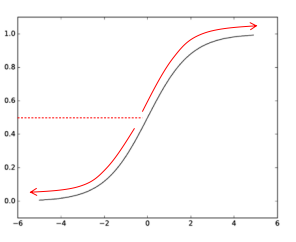


- math.exp(-1) = 1/2.71828… = 0.3678…

- math.exp(-2) = 1/7.38905 = 0.1353…

- math.exp(1) = 2.71828…

- math.exp(2) = 7.38905…

<br>
즉, exp(-x)에서 ...

- X의 값이 양수일 때는 클수록 작아짐 → 전체 결과는 1에 가까워짐

- X의 값이 양수일 때는 작을수록 1에 가까워짐 → 전체 결과는 0.5에 가까워짐

- X의 값이 음수일 때는 클수록 커짐 → 전체 결과는 0에 가까워짐

- X의 값이 음수일 때는 작을수록 1에 가까워짐 → 전체 결과는 0.5에 가까워짐



In [24]:
# 시그모이드 점수 계산
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

newdata['sigmoid'] = newdata.senti_score.apply(sigmoid)


# 결과 확인
newdata.head()

,id,text,original,pos,neg,senti_score,new,matched,sigmoid
0,8132799,디자인 배우 학생 외국 디자이너 일구 전통 통하 발전 문화 산업 부럽 사실 우리나라...,1,5,1,4,1.0,True,0.982014
1,4655635,폴리스스토리 시리즈 뉴 없 최고,1,1,0,1,1.0,True,0.731059
2,9251303,와 연기 진짜 쩔 지루 생각하 몰입 그래 이런 진짜 영화,1,0,1,-1,0.0,False,0.268941
3,10067386,안개 자욱 하 밤하늘 뜨 초승달 같 영화,1,0,0,0,0.0,False,0.500000
4,2190435,사랑 해보 사람 처음 끝 웃 있 영화,1,2,0,2,1.0,True,0.880797


# 머신러닝을 활용한 감성분석


기존에 불러온 data를 사용한다.

In [26]:
data_text = [line[1] for line in data] # 데이터 본문
data_senti = [line[2] for line in data] # 데이터 긍부정 부분

In [28]:
# 훈련데이터 (TR)와 테스트데이터 (TS) 분리 (자동 1:1 비율)
from sklearn.model_selection import train_test_split # 본문과 라벨을 각각 분리
train_data_text, test_data_text, train_data_senti, test_data_senti = train_test_split(data_text, data_senti, stratify=data_senti)

# Counter 클래스를 이용해 각 분류가 훈련데이터와 테스트데이터에 같은 비율로 들어갔는지 확인해 본다
from collections import Counter
train_data_senti_freq = Counter(train_data_senti)
print('train_data_senti_freq:', train_data_senti_freq)

test_data_senti_freq = Counter(test_data_senti)
print('test_data_senti_freq:', test_data_senti_freq)

train_data_senti_freq: Counter({'1': 74097, '0': 74037})
test_data_senti_freq: Counter({'1': 24699, '0': 24680})


In [29]:
# 훈련데이터 (TR)와 테스트데이터 (TS) 분리 (수동 7:3 비율)
import random
random.shuffle(data) # 랜덤하게 섞는다

data_70 = int(len(data)*0.7) # 전체 데이터 크기의 70% 숫자를 찾는다
train_data = data[:data_70] # 앞에서 70% 부분을 잘라 훈련데이터로
test_data = data[data_70:] # 그 뒷부분을 테스트데이터로

print('train data length:', len(train_data)) # 138079 (70%)
print('test data length:', len(test_data)) # 59178 (30%)

# 훈련데이터 요소 분리
train_data_text = [line[1] for line in train_data] # 훈련데이터 본문
train_data_senti = [line[2] for line in train_data] # 훈련데이터 긍부정 부분

# 테스트데이터 요소 분리
test_data_text = [line[1] for line in test_data] # 테스트데이터 본문
test_data_senti = [line[2] for line in test_data] # 테스트데이터 긍부정 부분

train data length: 138259
test data length: 59254


물론 자동으로 7:3 비율로 잘리게 조절할 수 있다. 

(항상 랜덤으로 잘라서 random seed 미지정시 작동할 때 마다 다른 값이 나옴)

In [30]:
# 행렬 형태로 변환 (DTM 기반)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=5).fit(train_data_text) # 최소 문서 빈도 5이상의 단어만 대상
X_train = vect.transform(train_data_text) # 행렬 생성
print("X_train:\n", repr(X_train)) # 생성된 행렬 개요

X_train:
 <138259x11244 sparse matrix of type '<class 'numpy.int64'>'
	with 766080 stored elements in Compressed Sparse Row format>


- 즉 138259개의 행, 11244 열의 matrix가 생겼다.

- 그 중 입력된 셀은 766080개에 불가하다.
(전체의 0.05 % 만 채워지고 99.5%는 비워져 있다.)

- 머신러닝을 이용해서 감성분석의 핵심은 알고리즘을 어떤 걸 쓰냐 보다는 오히려 독립변수를 DTM으로 만들어서 넣는 과정이다.

=> DTM의 단점 (보통 0이 많은 희소 행렬 형태가 됨)

vect.transform(train_data_text).toarray() 을 할 경우 행렬의 형태가 나온다. 하지만 메모리 문제로 일단 생략한다.
<br><br>
※ CountVectorizer는 기본적으로 1글자는 무시한다. 

1글자도 모두 찾게 하려면 다음과 같이 한다
CountVectorizer(min_df=5, token_pattern=r"\b\w+\b") 

In [31]:
# 행렬 내용 관찰 (일부)
feature_names = vect.get_feature_names()
print("특성 개수:", len(feature_names))
print("처음 20개 특성:\m", feature_names[:20]) # 처음 20개만
print("3000~5000까지의 특성:\n", feature_names[3000:5000]) # 3000~5000만

특성 개수: 11244
처음 20개 특성:\m ['10점', '1빠', 'cgv', 'ebs', 'jtbc', 'kbs', 'la', 'mb', 'mbc', 'naver', 'new', 'ok', 'sbs', 'sns', 'tv', 'usb', 'ㄴㄴ', 'ㄴㅁ', 'ㄷㄷ', 'ㅂㄷㅂㄷ']
3000~5000까지의 특성:
 ['마크', '마키', '마트', '마틴', '마틸다', '마피아', '막가', '막걸리', '막내', '막대', '막되', '막론', '막막', '막말', '막무가내', '막바지', '막상', '막스', '막심', '막연', '막장', '막지', '막판', '막히', '만개', '만그', '만끽', '만나', '만날', '만남', '만능', '만담', '만들', '만듦새', '만땅', '만만', '만명', '만발', '만보', '만사', '만세', '만약', '만인', '만점', '만족', '만족감', '만주', '만지', '만찬', '만하', '만해', '만행', '만화', '만화가', '만화영화', '만화책', '만회', '많이', '말기', '말길', '말년', '말로', '말론', '말리', '말빨', '말살', '말세', '말씀', '말아먹', '말없이', '말입', '말자', '말장난', '말종', '말초신경', '말코비치', '말콤', '말타', '말투', '말하', '말하기', '말해', '맘껏', '맘대로', '맘마', '맘마미아', '맘속', '맙소사', '맛깔', '맛보', '맛보기', '맛없', '맛있', '맛집', '망가', '망가뜨리', '망가지', '망각', '망상', '망설이', '망설임', '망신', '망인', '망조', '망쳐놓', '망치', '망하', '맞대', '맞먹', '맞물리', '맞서', '맞았어', '맞이', '맞추', '맞춤', '맞춤법', '맡기', '매개체', '매국노', '매기', '매끄럽', '매너', '매년', '매니아', '매니저', '매달', '매달리', '매도', '매드', '매들린

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


여기서는 로지스틱 회귀분석을 사용한다. 

여러 분류 알고리즘이 있으니 SVM, XGboost, 로지스틱 회귀분석 등 여러 모델을 사용해서 성능을 비교해본다.

In [33]:
# 로지스틱 회귀분석 적용
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

y_train = pd.Series(train_data_senti) # 리스트 형태를 종속변수가 될 수 있는 1차원 배열(Series)로 만든다

lr = LogisticRegression(solver="liblinear") # 모델 생성
lr.fit(X_train, y_train) # 모델 훈련

LogisticRegression(solver='liblinear')

In [34]:
# TS 넣어서 검증하기
X_test = vect.transform(test_data_text)
y_test = pd.Series(test_data_senti)
print("테스트 데이터 점수:", lr.score(X_test, y_test))

테스트 데이터 점수: 0.8074729132210484


사전기반으로 할 때와 다른 결과가 나옴. 

왜냐하면 사전에는 '중립' 데이터가 있었음. 

그러나 ML과 DL은 있는 데이터 기반해서 결과가 나옴

**=> 어떤게 더 좋다고 할 수는 없음**

In [35]:
# 1개 데이터 예측 (새로운 데이터. 유저거 입력하는, TS로 봐도 무방)

# 형태소분석기 시작
import rhinoMorph
rn = rhinoMorph.startRhino()

new_input = '즐거운 하루!'# 유저가 새롭게 입력한 데이터
inputdata = []
morphed_input = rhinoMorph.onlyMorph_list(
    rn, new_input, pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'])
morphed_input = ' '.join(morphed_input) # ['즐겁', '하루]를 한 개 문자열로 변환. 영어 문장처럼 변환

inputdata.append(morphed_input) # 분석 결과를 리스트로 만들기. DTM을 만들기 위함임 (빈 리스트를 만들고 append 해도 되고 그냥 바로 리스트를 씌워도 무방함)
print('input data:', inputdata) # ['즐겁 하루']

filepath:  /usr/local/lib/python3.7/dist-packages
classpath:  /usr/local/lib/python3.7/dist-packages/rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!
input data: ['즐겁 하루']


inputdata (1개의 문장) 을 앞에서 만든 11232 컬럼의 행렬에 적용한다.(새롭게 만드는 것이 아니라 이미 만든 verctorize 객체 재사용)

=> 이 경우 새로운 데이터가 들어갔으니 행은 1개가 된다. 그러나 열은 앞에서 만든 11445개 이다.

In [36]:
X_input = vect.transform(inputdata) # 앞에서 만든 11232 컬럼의 행렬에 적용
result = lr.predict(X_input) # 0은 부정,1은 긍정

if result == "0" :  # 문자열 형태로 출력된다
  print("부정적인 글입니다")
else:
  print("긍정적인 글입니다")

긍정적인 글입니다
